In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(93, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    93 non-null     int64  
 1   V1      93 non-null     float64
 2   V2      93 non-null     float64
 3   V3      93 non-null     float64
 4   V4      93 non-null     float64
 5   V5      93 non-null     float64
 6   V6      93 non-null     float64
 7   V7      93 non-null     float64
 8   V8      93 non-null     float64
 9   V9      93 non-null     float64
 10  V10     93 non-null     float64
 11  V11     93 non-null     float64
 12  V12     93 non-null     float64
 13  V13     93 non-null     float64
 14  V14     93 non-null     float64
 15  V15     93 non-null     float64
 16  V16     93 non-null     float64
 17  V17     93 non-null     float64
 18  V18     93 non-null     float64
 19  V19     93 non-null     float64
 20  V20     93 non-null     float64
 21  V21     93 non-null     float64
 22  V22 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    93 non-null     int64  
 1   V1      93 non-null     float64
 2   V2      93 non-null     float64
 3   V3      93 non-null     float64
 4   V4      93 non-null     float64
 5   V5      93 non-null     float64
 6   V6      93 non-null     float64
 7   V7      93 non-null     float64
 8   V8      93 non-null     float64
 9   V9      93 non-null     float64
 10  V10     93 non-null     float64
 11  V11     93 non-null     float64
 12  V12     93 non-null     float64
 13  V13     93 non-null     float64
 14  V14     93 non-null     float64
 15  V15     93 non-null     float64
 16  V16     93 non-null     float64
 17  V17     93 non-null     float64
 18  V18     93 non-null     float64
 19  V19     93 non-null     float64
 20  V20     93 non-null     float64
 21  V21     93 non-null     float64
 22  V22 

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,31.913978,-0.107924,0.112144,0.868718,0.407490,0.085351,0.337615,0.166023,-0.010314,-0.051360,...,-0.002657,-0.014253,-0.001064,0.100292,0.138950,-0.050904,0.018044,0.007490,67.840645,0.0
std,16.713478,1.331996,1.149332,0.848141,1.276655,1.336059,1.319404,0.837622,0.695187,0.820858,...,0.412175,0.516030,0.411177,0.549138,0.406579,0.523271,0.302650,0.258661,191.052670,0.0
min,0.000000,-5.401258,-5.450148,-0.932038,-4.515824,-6.631951,-1.763406,-2.705393,-3.807864,-2.094011,...,-0.852309,-1.299920,-1.134769,-1.384620,-1.112725,-1.243924,-1.206921,-1.105751,0.750000,0.0
25%,18.000000,-0.847998,-0.116085,0.281211,-0.236070,-0.445980,-0.397506,-0.118760,-0.191270,-0.436167,...,-0.194796,-0.311726,-0.156858,-0.114862,-0.031157,-0.337657,-0.048220,-0.000580,6.140000,0.0
50%,34.000000,-0.291540,0.248414,0.844265,0.571405,-0.028469,0.019504,0.207904,0.081213,-0.097869,...,-0.053234,-0.004760,-0.065133,0.104744,0.155130,-0.217041,0.027182,0.023307,18.950000,0.0
75%,46.000000,1.110692,0.616109,1.351076,1.232106,0.418592,0.351296,0.563295,0.251256,0.262394,...,0.046949,0.235138,0.057504,0.414984,0.408300,0.165156,0.118754,0.093948,45.710000,0.0
max,60.000000,1.492936,2.600138,3.402585,3.710061,3.281972,5.122103,4.371691,1.530817,4.009259,...,1.943465,1.353650,2.458589,1.112970,0.820591,3.065576,0.857373,0.949594,1402.950000,0.0


In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.430366,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342857,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.635696,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.292909,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.011311,0


In [11]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.430366,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342857,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.635696,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.292909,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.011311,0


In [12]:
data.duplicated().any()

True

In [13]:
data = data.drop_duplicates()

In [14]:
data['Class'].value_counts()

Class
0    91
Name: count, dtype: int64

In [15]:
fraud_cases=len(data[data['Class']==1])

In [16]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 0


<Axes: ylabel='count'>

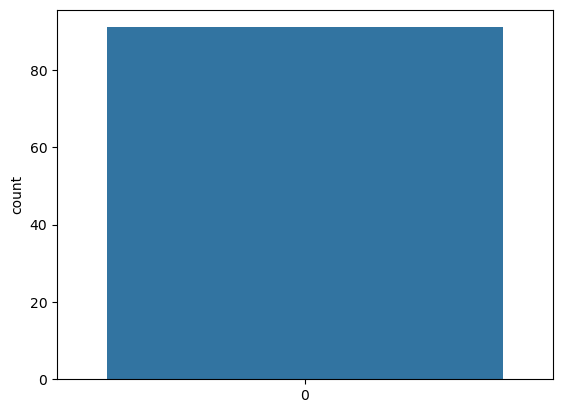

In [17]:
import seaborn as sns
sns.countplot(data['Class'])

In [18]:
X = data.drop('Class',axis=1)
y = data['Class']

In [19]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [20]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [21]:
print(legit.shape)
print(fraud.shape)

(91, 30)
(0, 30)


In [22]:
legit.Amount.describe()

count    91.000000
mean      0.007389
std       1.015265
min      -0.353066
25%      -0.322254
50%      -0.250605
75%      -0.113595
max       7.026051
Name: Amount, dtype: float64

In [23]:
fraud.Amount.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64

In [24]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.098589,0.095497,0.858158,0.413226,0.077909,0.342977,0.154241,-0.01445,-0.046199,0.132853,...,-0.045008,-0.003775,-0.019122,0.003008,0.102476,0.13984,-0.039865,0.020107,0.007119,0.007389


In [25]:
legit_sample = legit.sample(n=3)

In [26]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342857,0
87,-0.847998,1.043459,1.267369,1.135529,0.021362,0.336914,0.398480,0.317399,-0.028658,0.534033,...,-0.024046,0.215006,-0.131982,-0.007416,-0.136578,-0.242961,0.382931,0.276417,-0.250605,0
86,-0.773450,0.853112,0.818254,-0.236070,0.803463,-1.438728,0.799479,-0.007989,-0.761090,-1.044464,...,0.035362,-0.116890,-0.178926,0.400155,-0.026231,0.165156,0.027762,0.132980,-0.353014,0


In [27]:
new_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342857,0
87,-0.847998,1.043459,1.267369,1.135529,0.021362,0.336914,0.398480,0.317399,-0.028658,0.534033,...,-0.024046,0.215006,-0.131982,-0.007416,-0.136578,-0.242961,0.382931,0.276417,-0.250605,0
86,-0.773450,0.853112,0.818254,-0.236070,0.803463,-1.438728,0.799479,-0.007989,-0.761090,-1.044464,...,0.035362,-0.116890,-0.178926,0.400155,-0.026231,0.165156,0.027762,0.132980,-0.353014,0


In [28]:
new_dataset['Class'].value_counts()

Class
0    3
Name: count, dtype: int64

In [29]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.143197,0.720908,0.750701,0.449204,0.294947,-0.394725,0.373052,0.131504,-0.348391,-0.225802,...,-0.013773,-0.071487,-0.180185,-0.069873,0.017631,0.001454,0.01603,0.133903,0.141374,-0.315492


**Split the data**

In [30]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [31]:
print(X)

          V1        V2        V3        V4        V5        V6        V7  \
1   1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
87 -0.847998  1.043459  1.267369  1.135529  0.021362  0.336914  0.398480   
86 -0.773450  0.853112  0.818254 -0.236070  0.803463 -1.438728  0.799479   

          V8        V9       V10  ...       V20       V21       V22       V23  \
1   0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
87  0.317399 -0.028658  0.534033  ...  0.128622 -0.024046  0.215006 -0.131982   
86 -0.007989 -0.761090 -1.044464  ... -0.100858  0.035362 -0.116890 -0.178926   

         V24       V25       V26       V27       V28    Amount  
1  -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342857  
87 -0.007416 -0.136578 -0.242961  0.382931  0.276417 -0.250605  
86  0.400155 -0.026231  0.165156  0.027762  0.132980 -0.353014  

[3 rows x 29 columns]


In [32]:
print(Y)

1     0
87    0
86    0
Name: Class, dtype: int64


In [33]:
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

### Predit the data

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [36]:
confusion_matrix (y_test, y_pred)

array([[21,  3],
       [ 4, 32]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.91      0.89      0.90        36

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [38]:
accuracy_score(y_test, y_pred)

0.8833333333333333